<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Homework 8: Neurons & Shallow Neural Networks</h1>
    <h3></h3>
</center>


### 1. Problem

Consider the classification problem of the **Fashion-MNIST** dataset.

1) **Data processing**: Load the Fashion-MNIST dataset from PyTorch (`torchvision.datasets.FashionMNIST`), normalize the inputs, and construct training and test data loaders using mini-batches.

2) **Model training and prediction**: Build and train a shallow fully connected neural network (one hidden layer) to classify Fashion-MNIST images into 10 clothing categories. Record the training and test accuracy for each epoch and summarize the model architecture and training settings.

3) **Visualizing results**: 
   - Plot the **test accuracy** versus epoch.
   - Plot the **training loss** versus epoch.
   
Use these curves to discuss whether the model is underfitting, overfitting, or reasonably fitting.



### 2. Data processing


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import Compose, ToTensor, Normalize
import matplotlib.pyplot as plt

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### 3. Model training and prediction

We now define a shallow fully connected neural network (one hidden layer) and train it on Fashion-MNIST using mini-batch gradient-based optimization.



In [ ]:
def get_loader(train: bool, batch_size: int):
    transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])
    dataset = FashionMNIST(root="./homework_data", train=train, download=True, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=train)
    return loader

BATCH_SIZE = 128
TEST_BATCH_SIZE = 512
train_loader = get_loader(train=True, batch_size=BATCH_SIZE)
test_loader = get_loader(train=False, batch_size=TEST_BATCH_SIZE)

# Model: one hidden layer MLP
class FashionMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = FashionMLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 10
train_loss_history = []
test_acc_history = []
train_acc_history = []

def evaluate(loader):
    model.eval()
    correct = 0
    total = 0
    total_loss = 0.0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = criterion(out, y)
            total_loss += loss.item() * y.size(0)
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    avg_loss = total_loss / total
    acc = correct / total
    return acc, avg_loss

for epoch in range(1, EPOCHS + 1):
    model.train()
    running_loss = 0.0
    running_correct = 0
    running_total = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * y.size(0)
        running_correct += (out.argmax(dim=1) == y).sum().item()
        running_total += y.size(0)

    train_loss = running_loss / running_total
    train_acc = running_correct / running_total
    test_acc, _ = evaluate(test_loader)

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)
    print(f"Epoch {epoch:02d} | train_loss={train_loss:.4f} | train_acc={train_acc:.4f} | test_acc={test_acc:.4f}")


Epoch 01 | train_loss=0.5142 | train_acc=0.8116 | test_acc=0.8470
Epoch 02 | train_loss=0.3695 | train_acc=0.8645 | test_acc=0.8625
Epoch 02 | train_loss=0.3695 | train_acc=0.8645 | test_acc=0.8625
Epoch 03 | train_loss=0.3322 | train_acc=0.8772 | test_acc=0.8639
Epoch 03 | train_loss=0.3322 | train_acc=0.8772 | test_acc=0.8639
Epoch 04 | train_loss=0.3036 | train_acc=0.8875 | test_acc=0.8613
Epoch 04 | train_loss=0.3036 | train_acc=0.8875 | test_acc=0.8613
Epoch 05 | train_loss=0.2840 | train_acc=0.8941 | test_acc=0.8665
Epoch 05 | train_loss=0.2840 | train_acc=0.8941 | test_acc=0.8665
Epoch 06 | train_loss=0.2690 | train_acc=0.8994 | test_acc=0.8785
Epoch 06 | train_loss=0.2690 | train_acc=0.8994 | test_acc=0.8785
Epoch 07 | train_loss=0.2570 | train_acc=0.9034 | test_acc=0.8771
Epoch 07 | train_loss=0.2570 | train_acc=0.9034 | test_acc=0.8771
Epoch 08 | train_loss=0.2430 | train_acc=0.9086 | test_acc=0.8840
Epoch 08 | train_loss=0.2430 | train_acc=0.9086 | test_acc=0.8840
Epoch 09 |

### 4. Visualizing results


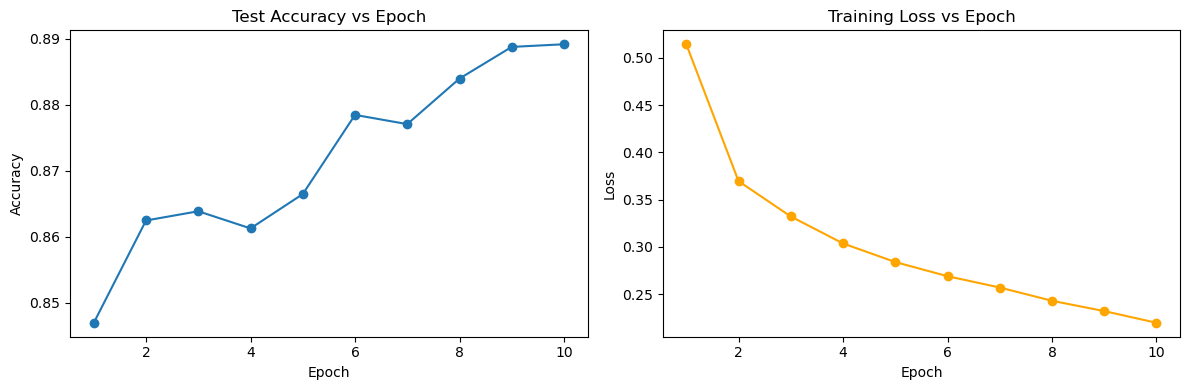

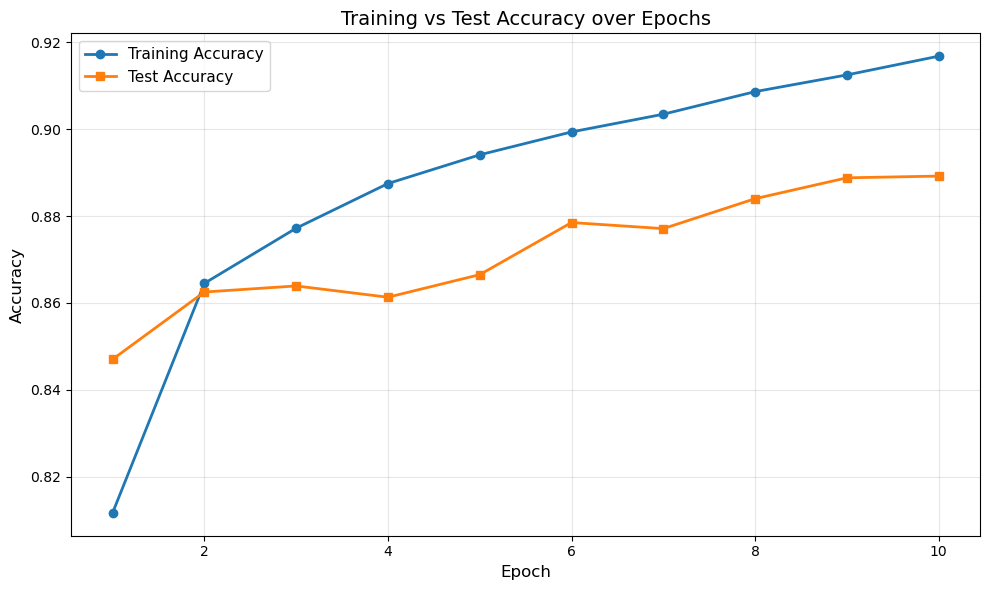

In [ ]:
# Visualize results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), test_acc_history, marker="o")
plt.title("Test Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), train_loss_history, marker="o", color="orange")
plt.title("Training Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS + 1), train_acc_history, marker="o", label="Training Accuracy", linewidth=2)
plt.plot(range(1, EPOCHS + 1), test_acc_history, marker="s", label="Test Accuracy", linewidth=2)
plt.title("Training vs Test Accuracy over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()